In [3]:
# Import needed modules 
# numpy will be used to convert lists to arrays and to use log, exp and fitting functions
import numpy as np 
# matplotlib will be used for plotting
import matplotlib.pyplot as plt

#### After the researcher did the fitting, she obtained the following values:
    qsat = 4.72 mmol/g
    k(263) = 6.75e-06 1/Pa
    k(303) = 1.48e-06 1/Pa
    k(343) = 5.16e-07 1/Pa

#### Use the Van't Hoff equation to obtain k0 and delta H

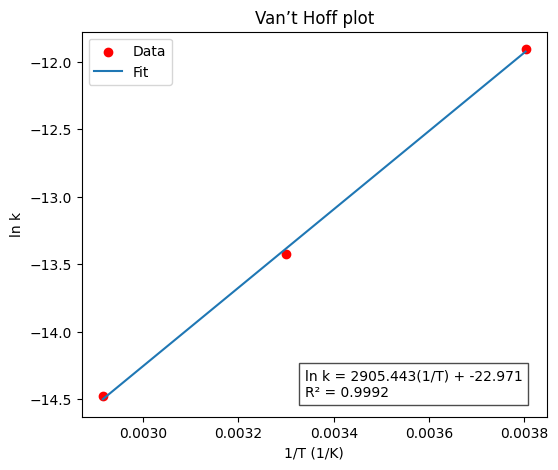

ΔH = -24.16 kJ/mol
k0 = 1.056e-10 (1/bar)


In [4]:
# Group the temperatures and K values in arrays

T = np.array([263, 303, 343]) 
k = np.array([6.75e-6, 1.48e-6, 5.16e-7])

# We know that we need to plot lnk vs. 1/T

invT = 1 / T
lnk = np.log(k)

# Plot of lnk vs. 1/T

x_mean = np.mean(invT)
y_mean = np.mean(lnk)

slope = np.sum((invT - x_mean) * (lnk - y_mean)) / np.sum((invT - x_mean)**2)
intercept = y_mean - slope * x_mean

ss_tot = np.sum((lnk - y_mean)**2)
ss_res = np.sum((lnk - (slope*invT + intercept))**2)
R2 = 1 - ss_res/ss_tot

fig, ax = plt.subplots(figsize=(6, 5))
plt.scatter(invT, lnk, color='red', label='Data')
plt.plot(invT, slope*invT + intercept, label='Fit')

line_eq = f"ln k = {slope:.3f}(1/T) + {intercept:.3f}\nR² = {R2:.4f}"
plt.text(invT.mean(), lnk.min(), line_eq, fontsize=10,
bbox=dict(facecolor='white', alpha=0.7))


plt.xlabel('1/T (1/K)')
plt.ylabel('ln k')
plt.title("Van’t Hoff plot")
plt.legend()
plt.show()

# Solve for the unknowns by linear fitting

R = 8.314 
delta_H = -slope * R 
k0 = np.exp(intercept)

# Print the results

print(f"ΔH = {delta_H/1000:.2f} kJ/mol")
print(f"k0 = {k0:.3e} (1/bar)")

#### Calculate Henry's coefficients for the different temperatures

In [25]:
# Calculating the Henry's coefficients
# Remember the formula for Kh (mmol/(g.Pa))

def henrys_law_pressure(T, delta_H, k0):
    """Calculates the Henry's coefficient at temperature T"""
    q_sat = 4.72 
    R = 8.314
    Kh =q_sat*k0 * np.exp(-delta_H / (R * T))
    return Kh

KH263=henrys_law_pressure(263, delta_H, k0)
KH303=henrys_law_pressure(303, delta_H, k0)
KH343=henrys_law_pressure(343, delta_H, k0)


#print the results

print(f"KH(T=263 K)= {KH263*1e6:.3f} mmol/(g·Pa)")
print(f"KH(T=303 K) = {KH303*1e6:.3f} mmol/(g·Pa)")
print(f"KH(T=343 K) = {KH343*1e6:.3f} mmol/(g·Pa)") 


KH(T=263 K)= 31.295 mmol/(g·Pa)
KH(T=303 K) = 7.280 mmol/(g·Pa)
KH(T=343 K) = 2.379 mmol/(g·Pa)


*Note to reader*: ChatGPT (GPT-5, by OpenAI) was consulted for Matplotlib guidance in producing the graph. The information was adapted and integrated into the final work.